# Rawdata preprocessing

In [1]:
import pandas as pd
import numpy as np


filename = 'fashion20000_rawdata.json'

df = pd.read_json(filename)
#df.head()

In [2]:
base_df = df[['id','username','hashtags']]
#base_df.head()
#base_df.info()

In [3]:
# user 1명당 hashtag 1개씩만 사용하도록 합니다. (광고성 게시물이 특정 태그의 갯수를 늘리기 때문에)
groupby_df = base_df.groupby('username').agg({'hashtags' : 'sum'})

In [4]:
# 잘못된 데이터들을 처리해줍니다.
fashion_df = groupby_df[groupby_df.astype(str)['hashtags'] != '[]']

In [5]:
fashion_df.head()

,hashtags
username,
,"[ktmboy, modellife, wanderlust, ktmlife, biker..."
007____alzeb,"[beauti, cosmetic, makeup, shoes, fashionblogg..."
04.30kumi,"[bodymake, love, 気愛, 美容, 三児ママ, 40代, style, mak..."
07._07._07_,"[styles, fashionstyle, styleblogger, instastyl..."
0portraits0,"[fashionstyle, fashionpost, fashionista, fashi..."


In [6]:
fashion_df = fashion_df[1:]
fashion_df.head()

,hashtags
username,
007____alzeb,"[beauti, cosmetic, makeup, shoes, fashionblogg..."
04.30kumi,"[bodymake, love, 気愛, 美容, 三児ママ, 40代, style, mak..."
07._07._07_,"[styles, fashionstyle, styleblogger, instastyl..."
0portraits0,"[fashionstyle, fashionpost, fashionista, fashi..."
0ption,"[fashiondesigner, fashionlover, bmorefashion, ..."


In [7]:
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 007____alzeb to zxed_umpq
Data columns (total 1 columns):
hashtags    9962 non-null object
dtypes: object(1)
memory usage: 155.7+ KB


In [8]:
def getTagsDict(df):
    tag_dict = {}
    
    for index, row in df.iterrows():
        for tag in row['hashtags']:
            if tag in tag_dict:
                tag_dict[tag] = tag_dict[tag] + 1
            else:
                tag_dict[tag] = 1
                
    sort_dict = sorted(tag_dict.items(), key=lambda kv: kv[1])
    return sort_dict

sort_dict = getTagsDict(fashion_df)

In [9]:
sort_dict[-10:]

[('fashiondesigner', 3400),
 ('fashionstyle', 3721),
 ('fashionable', 3836),
 ('model', 3945),
 ('fashionista', 4760),
 ('style', 5697),
 ('fashionblogger', 5804),
 ('fashionweek', 7274),
 ('fashionshow', 10019),
 ('fashion', 10600)]

In [11]:
# 중복을 제거해줍니다. (한 글에 동일한 태그 여러 번)

tag_df = fashion_df['hashtags']

for i in range(len(tag_df)):
#     if "fashion" in tag_df[i] == False:
#         print(tag_df[i])
    tag_df[i] = list(set(tag_df[i]))

fashion_df['hashtags'] = tag_df


In [12]:
sort_dict = getTagsDict(fashion_df)
print(sort_dict[-10:])
print(fashion_df.info())

[('instagood', 1823), ('fashionstyle', 1830), ('fashionable', 2014), ('model', 2169), ('fashionista', 2399), ('fashionblogger', 2978), ('style', 3152), ('fashionweek', 4102), ('fashionshow', 5349), ('fashion', 6460)]
<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 007____alzeb to zxed_umpq
Data columns (total 1 columns):
hashtags    9962 non-null object
dtypes: object(1)
memory usage: 475.7+ KB
None


In [14]:
# # 이번에는 fashion 태그의 갯수가 부족합니다. fashion태그를 가지고 있지 않은 row데이터를 지워줍니다.
# remove_index_list = []

# for index,raw in fashion_df.iterrows():
#     for i in raw:
#         if 'fashion' in i:
#             pass
#         else:
#             remove_index_list.append(index)
            
# fashion_df = fashion_df.drop(remove_index_list)

In [13]:
sort_dict = getTagsDict(fashion_df)

print(sort_dict[-1])
print(fashion_df.info())

('fashion', 6460)
<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 007____alzeb to zxed_umpq
Data columns (total 1 columns):
hashtags    9962 non-null object
dtypes: object(1)
memory usage: 475.7+ KB
None


#### 피어슨 상관계수 r = A와B가 함께 변하는 정도 / A와 B가 각각 변하는 정도

In [14]:
#df_500 = fashion_df[:500]
sort_dict = getTagsDict(fashion_df)
fashion_dict = sort_dict

#df_500.head()

In [15]:
fashion_dict[-30:]

[('streetstyle', 861),
 ('instastyle', 868),
 ('photography', 918),
 ('fashionaddict', 962),
 ('fashiondesign', 981),
 ('fashiondaily', 989),
 ('styleblogger', 1084),
 ('fashionlover', 1084),
 ('fashionphotography', 1085),
 ('ootd', 1200),
 ('photooftheday', 1211),
 ('fashionpost', 1230),
 ('beautiful', 1247),
 ('beauty', 1251),
 ('fashionblog', 1310),
 ('fashiongram', 1326),
 ('love', 1405),
 ('fashiondiaries', 1413),
 ('instafashion', 1495),
 ('fashiondesigner', 1654),
 ('instagood', 1823),
 ('fashionstyle', 1830),
 ('fashionable', 2014),
 ('model', 2169),
 ('fashionista', 2399),
 ('fashionblogger', 2978),
 ('style', 3152),
 ('fashionweek', 4102),
 ('fashionshow', 5349),
 ('fashion', 6460)]

In [16]:
len(fashion_dict)

50297

In [118]:
fashion_dict = fashion_dict[-300:]

In [119]:
print(len(fashion_dict))

100


In [114]:
tag_list = []
for i in fashion_dict:
    tag_list.append(i[0])

print(tag_list)
print(len(tag_list))

['womensfashion', 'tbt', 'fashionlovers', 'fashionphotographer', 'cool', 'shopping', 'instagramanet', 'parisfashionweek', 'photographer', 'menswear', 'instatag', 'classy', 'clothes', 'lookbook', 'fashionillustration', 'like4like', 'couture', 'pfw', 'nails', 'instalike', 'luxury', 'hairstyle', 'happy', 'catwalk', 'tagblender', 'photoshoot', 'instadaily', 'accessories', 'winter', 'photo', 'girls', 'lifestyle', 'streetwear', 'fashionistas', 'hautecouture', 'streetfashion', 'swag', 'me', 'followme', 'fashions', 'models', 'dress', 'instagram', 'blogger', 'fashionstylist', 'designer', 'follow', 'fashionmodel', 'design', 'fashiongirl', 'styleblog', 'styleoftheday', 'girl', 'picoftheday', 'shoes', 'pretty', 'stylish', 'styles', 'hair', 'outfit', 'look', 'outfitoftheday', 'mensfashion', 'art', 'paris', 'moda', 'modeling', 'runway', 'makeup', 'cute', 'streetstyle', 'instastyle', 'photography', 'fashionaddict', 'fashiondesign', 'fashiondaily', 'styleblogger', 'fashionlover', 'fashionphotography',

In [33]:
tmp = list()
for i in range(len(tag_list)):
    tmp.append(0)
len(tmp)

100

In [46]:
test=df_500.loc['03_artistseuk']
test['hashtags']

['follow',
 'selfie_time',
 'photooftheday',
 '패션',
 'followme',
 'heart',
 'instagood',
 'swag',
 '패션스타그램',
 'ootd',
 'tbt',
 'love',
 '얼스타그램',
 'selfie',
 'f4f',
 'fashion',
 'tagsforlikesapp',
 'korea',
 'follow4follow',
 '좋아요반사',
 'follow4like',
 'me',
 '좋아요',
 'instadaily',
 'follow4followback',
 'followback',
 'followforfollowback',
 'likeforfollow',
 'i4i',
 'selfies']

In [51]:
test = [1,2,3,4,5]
test2 = test.copy()
test2.append(7)

print(test)
print(test2)

[1, 2, 3, 4, 5]
[1, 2, 3, 4, 5, 7]


In [36]:
print(len(fashion_df))

9962


# Affinity Matrix

In [115]:
# Affinity Matrix를 만들기 위힌 dataFrame을 만드는 함수입니다.

def get_DataFrame_for_affinity(df,taglist):
    
    result_df = pd.DataFrame(index = np.arange(0,len(df)),columns=taglist)    
    
    zero_list = list()
    for i in range(len(taglist)):
        zero_list.append(0)
    
    i = 0
    for index,row in df.iterrows():
        
        tmp_df = df.loc[index]
        tmp_list = zero_list.copy()
        
        hashlist = tmp_df['hashtags']
        
        for tag in hashlist:
            if tag in taglist:
                tagindex = taglist.index(tag)
                tmp_list[tagindex] = 1
        
        result_df.loc[i] = tmp_list
        i += 1
    
    return result_df
        

In [116]:
before_corr = get_DataFrame_for_affinity(fashion_df,tag_list)

In [120]:
before_corr

,womensfashion,tbt,fashionlovers,fashionphotographer,cool,shopping,instagramanet,parisfashionweek,photographer,menswear,...,instagood,fashionstyle,fashionable,model,fashionista,fashionblogger,style,fashionweek,fashionshow,fashion
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,1,1,0,1,1,1,1,1,1
3,0,0,0,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
6,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,1,1,1,1,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [39]:
corr_affinity = before_corr.corr(method = 'pearson')

In [40]:
corr_affinity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, womensfashion to fashion
Data columns (total 100 columns):
womensfashion          100 non-null float64
tbt                    100 non-null float64
fashionlovers          100 non-null float64
fashionphotographer    100 non-null float64
cool                   100 non-null float64
shopping               100 non-null float64
instagramanet          100 non-null float64
parisfashionweek       100 non-null float64
photographer           100 non-null float64
menswear               100 non-null float64
instatag               100 non-null float64
classy                 100 non-null float64
clothes                100 non-null float64
lookbook               100 non-null float64
fashionillustration    100 non-null float64
like4like              100 non-null float64
couture                100 non-null float64
pfw                    100 non-null float64
nails                  100 non-null float64
instalike              100 non-null float64
lux

In [44]:
corr_affinity['fashionweek'].sort_values(ascending =False)

fashionweek           1.000000
fashionblogger        0.443652
fashionable           0.434068
fashionista           0.403167
fashiondiaries        0.393550
fashionstyle          0.373689
fashionblog           0.362479
fashionpost           0.340087
fashiongram           0.338650
fashiondesigner       0.314595
fashiondaily          0.312230
fashionlover          0.301714
styleblogger          0.282065
fashionphotography    0.269242
fashiondesign         0.267013
fashionaddict         0.261635
styleblog             0.254659
instastyle            0.247039
instafashion          0.244667
style                 0.231614
styleoftheday         0.224070
fashiongirl           0.220944
streetstyle           0.197776
styles                0.193653
tagblender            0.193627
fashions              0.185389
instatag              0.183390
instagramanet         0.182814
outfitoftheday        0.177358
fashionstylist        0.174414
                        ...   
menswear              0.037732
luxury  

In [106]:
corr_affinity = corr_affinity.drop('fashion',axis=1)

In [107]:
corr_affinity = corr_affinity.drop('fashion',axis = 0)

In [41]:
corr_affinity

,womensfashion,tbt,fashionlovers,fashionphotographer,cool,shopping,instagramanet,parisfashionweek,photographer,menswear,...,instagood,fashionstyle,fashionable,model,fashionista,fashionblogger,style,fashionweek,fashionshow,fashion
womensfashion,1.000000,-0.015699,-0.002261,-0.009542,-0.023519,0.011304,-0.030664,0.010949,-0.003508,0.016505,...,-0.049121,0.182707,0.026516,-0.047477,0.163438,0.156919,0.074556,0.111276,-0.041618,0.068063
tbt,-0.015699,1.000000,-0.030513,-0.023717,0.000620,-0.009896,-0.003146,-0.027425,0.003033,-0.014467,...,0.179985,-0.066895,-0.059119,-0.000518,-0.060055,-0.062489,-0.016756,-0.057924,-0.089958,0.047814
fashionlovers,-0.002261,-0.030513,1.000000,0.253698,-0.017377,-0.024304,-0.031261,-0.007447,-0.011364,-0.015131,...,-0.061949,0.253828,0.204424,-0.068568,0.066039,0.054769,-0.058954,0.126570,0.070148,-0.060243
fashionphotographer,-0.009542,-0.023717,0.253698,1.000000,-0.017604,-0.024498,-0.031423,-0.000938,0.045518,-0.008706,...,-0.068538,0.220020,0.170482,-0.009581,0.097594,0.081494,-0.053570,0.122111,0.089053,-0.020645
cool,-0.023519,0.000620,-0.017377,-0.017604,1.000000,0.013005,-0.031423,-0.014510,-0.004902,0.007972,...,0.020798,-0.040031,0.091761,0.137958,0.078424,0.069984,0.132746,0.049544,0.010384,-0.039039
shopping,0.011304,-0.009896,-0.024304,-0.024498,0.013005,1.000000,-0.028083,-0.014591,-0.028491,0.024505,...,0.055258,-0.032697,-0.035305,0.026952,-0.009524,-0.009676,0.090659,-0.031789,-0.096939,0.077761
instagramanet,-0.030664,-0.003146,-0.031261,-0.031423,-0.031423,-0.028083,1.000000,-0.031637,-0.031955,-0.032219,...,0.270024,0.318955,0.313871,-0.085286,0.281476,0.241609,0.223635,0.182814,0.131150,0.122306
parisfashionweek,0.010949,-0.027425,-0.007447,-0.000938,-0.014510,-0.014591,-0.031637,1.000000,-0.008629,0.077102,...,-0.061682,-0.039378,-0.056295,-0.000880,-0.051280,-0.023477,-0.031046,0.088655,0.018313,-0.029767
photographer,-0.003508,0.003033,-0.011364,0.045518,-0.004902,-0.028491,-0.031955,-0.008629,1.000000,-0.016181,...,0.007311,-0.034697,-0.053204,0.116001,-0.047356,0.008475,0.009024,-0.012261,-0.027190,0.061173
menswear,0.016505,-0.014467,-0.015131,-0.008706,0.007972,0.024505,-0.032219,0.077102,-0.016181,1.000000,...,-0.022200,-0.021019,-0.028604,0.004130,-0.036566,-0.000953,0.054968,0.037732,0.003200,-0.006664


In [59]:
corr_affinity['womensfashion']

womensfashion          1.000000
tbt                   -0.015699
fashionlovers         -0.002261
fashionphotographer   -0.009542
cool                  -0.023519
shopping               0.011304
instagramanet         -0.030664
parisfashionweek       0.010949
photographer          -0.003508
menswear               0.016505
instatag              -0.031331
classy                -0.017771
clothes                0.022798
lookbook               0.330336
fashionillustration    0.042186
like4like             -0.018616
couture                0.024706
pfw                    0.004473
nails                 -0.025599
instalike             -0.018962
luxury                -0.006978
hairstyle             -0.023287
happy                 -0.023657
catwalk                0.005112
tagblender            -0.030408
photoshoot             0.004421
instadaily            -0.002296
accessories           -0.002560
winter                -0.006211
photo                 -0.009339
                         ...   
streetst

# max_values

In [70]:
max_values = []
for tag in tag_list:
    
    series = corr_affinity[tag].sort_values(ascending = False)
    max_value = [series[1],series[2],series[3],series[4],series[5]]
    max_list = []
    for i in range(5):
        max_list.append(series[series == max_value[i]].index[0])
    max_values.append(max_list)

In [71]:
print(max_values[0][0])
print(corr_affinity['womensfashion'].sort_values(ascending = False))


streetfashion
womensfashion          1.000000
streetfashion          0.363293
lookbook               0.330336
mensfashion            0.313444
instafashion           0.221060
stylish                0.220173
streetstyle            0.219835
styleblog              0.203245
outfitoftheday         0.190968
instastyle             0.188861
fashionstyle           0.182707
fashiondiaries         0.166826
fashionista            0.163438
fashionblogger         0.156919
styleblogger           0.155182
ootd                   0.153335
fashionweek            0.111276
fashionaddict          0.081516
style                  0.074556
fashion                0.068063
fashionmodel           0.057353
fashiondesigner        0.053425
fashionblog            0.053410
fashionphotography     0.051217
fashiongram            0.050557
fashionlover           0.043598
fashionillustration    0.042186
fashiondesign          0.041500
fashionpost            0.033583
fashionable            0.026516
                         .

In [72]:
len(max_values)

100

In [73]:
len(max_values[0])

5

In [74]:
max_values[99]

['style', 'beautiful', 'love', 'instafashion', 'beauty']

# Clustering

In [150]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
sc = SpectralClustering()
km = KMeans()

In [151]:
ap.fit(corr_affinity)
km.fit(corr_affinity)
predict = pd.DataFrame(ap.predict(corr_affinity))
predict.columns = ['predict']
predict.head()

,predict
0,7
1,3
2,4
3,4
4,1


# Build Node

In [47]:
top100 = pd.DataFrame(fashion_dict, columns=['Tag','Freq'])


In [154]:
node_df = top100
node_df

,Tag,Freq,Group
0,womensfashion,288,7
1,tbt,291,3
2,fashionlovers,299,4
3,fashionphotographer,302,4
4,cool,302,1
5,shopping,303,6
6,instagramanet,305,5
7,parisfashionweek,306,2
8,photographer,312,8
9,menswear,317,1


In [152]:
node_df['Group'] = predict

In [113]:
node_df = node_df[:49]
node_df = node_df.drop(29,axis=0)

In [50]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

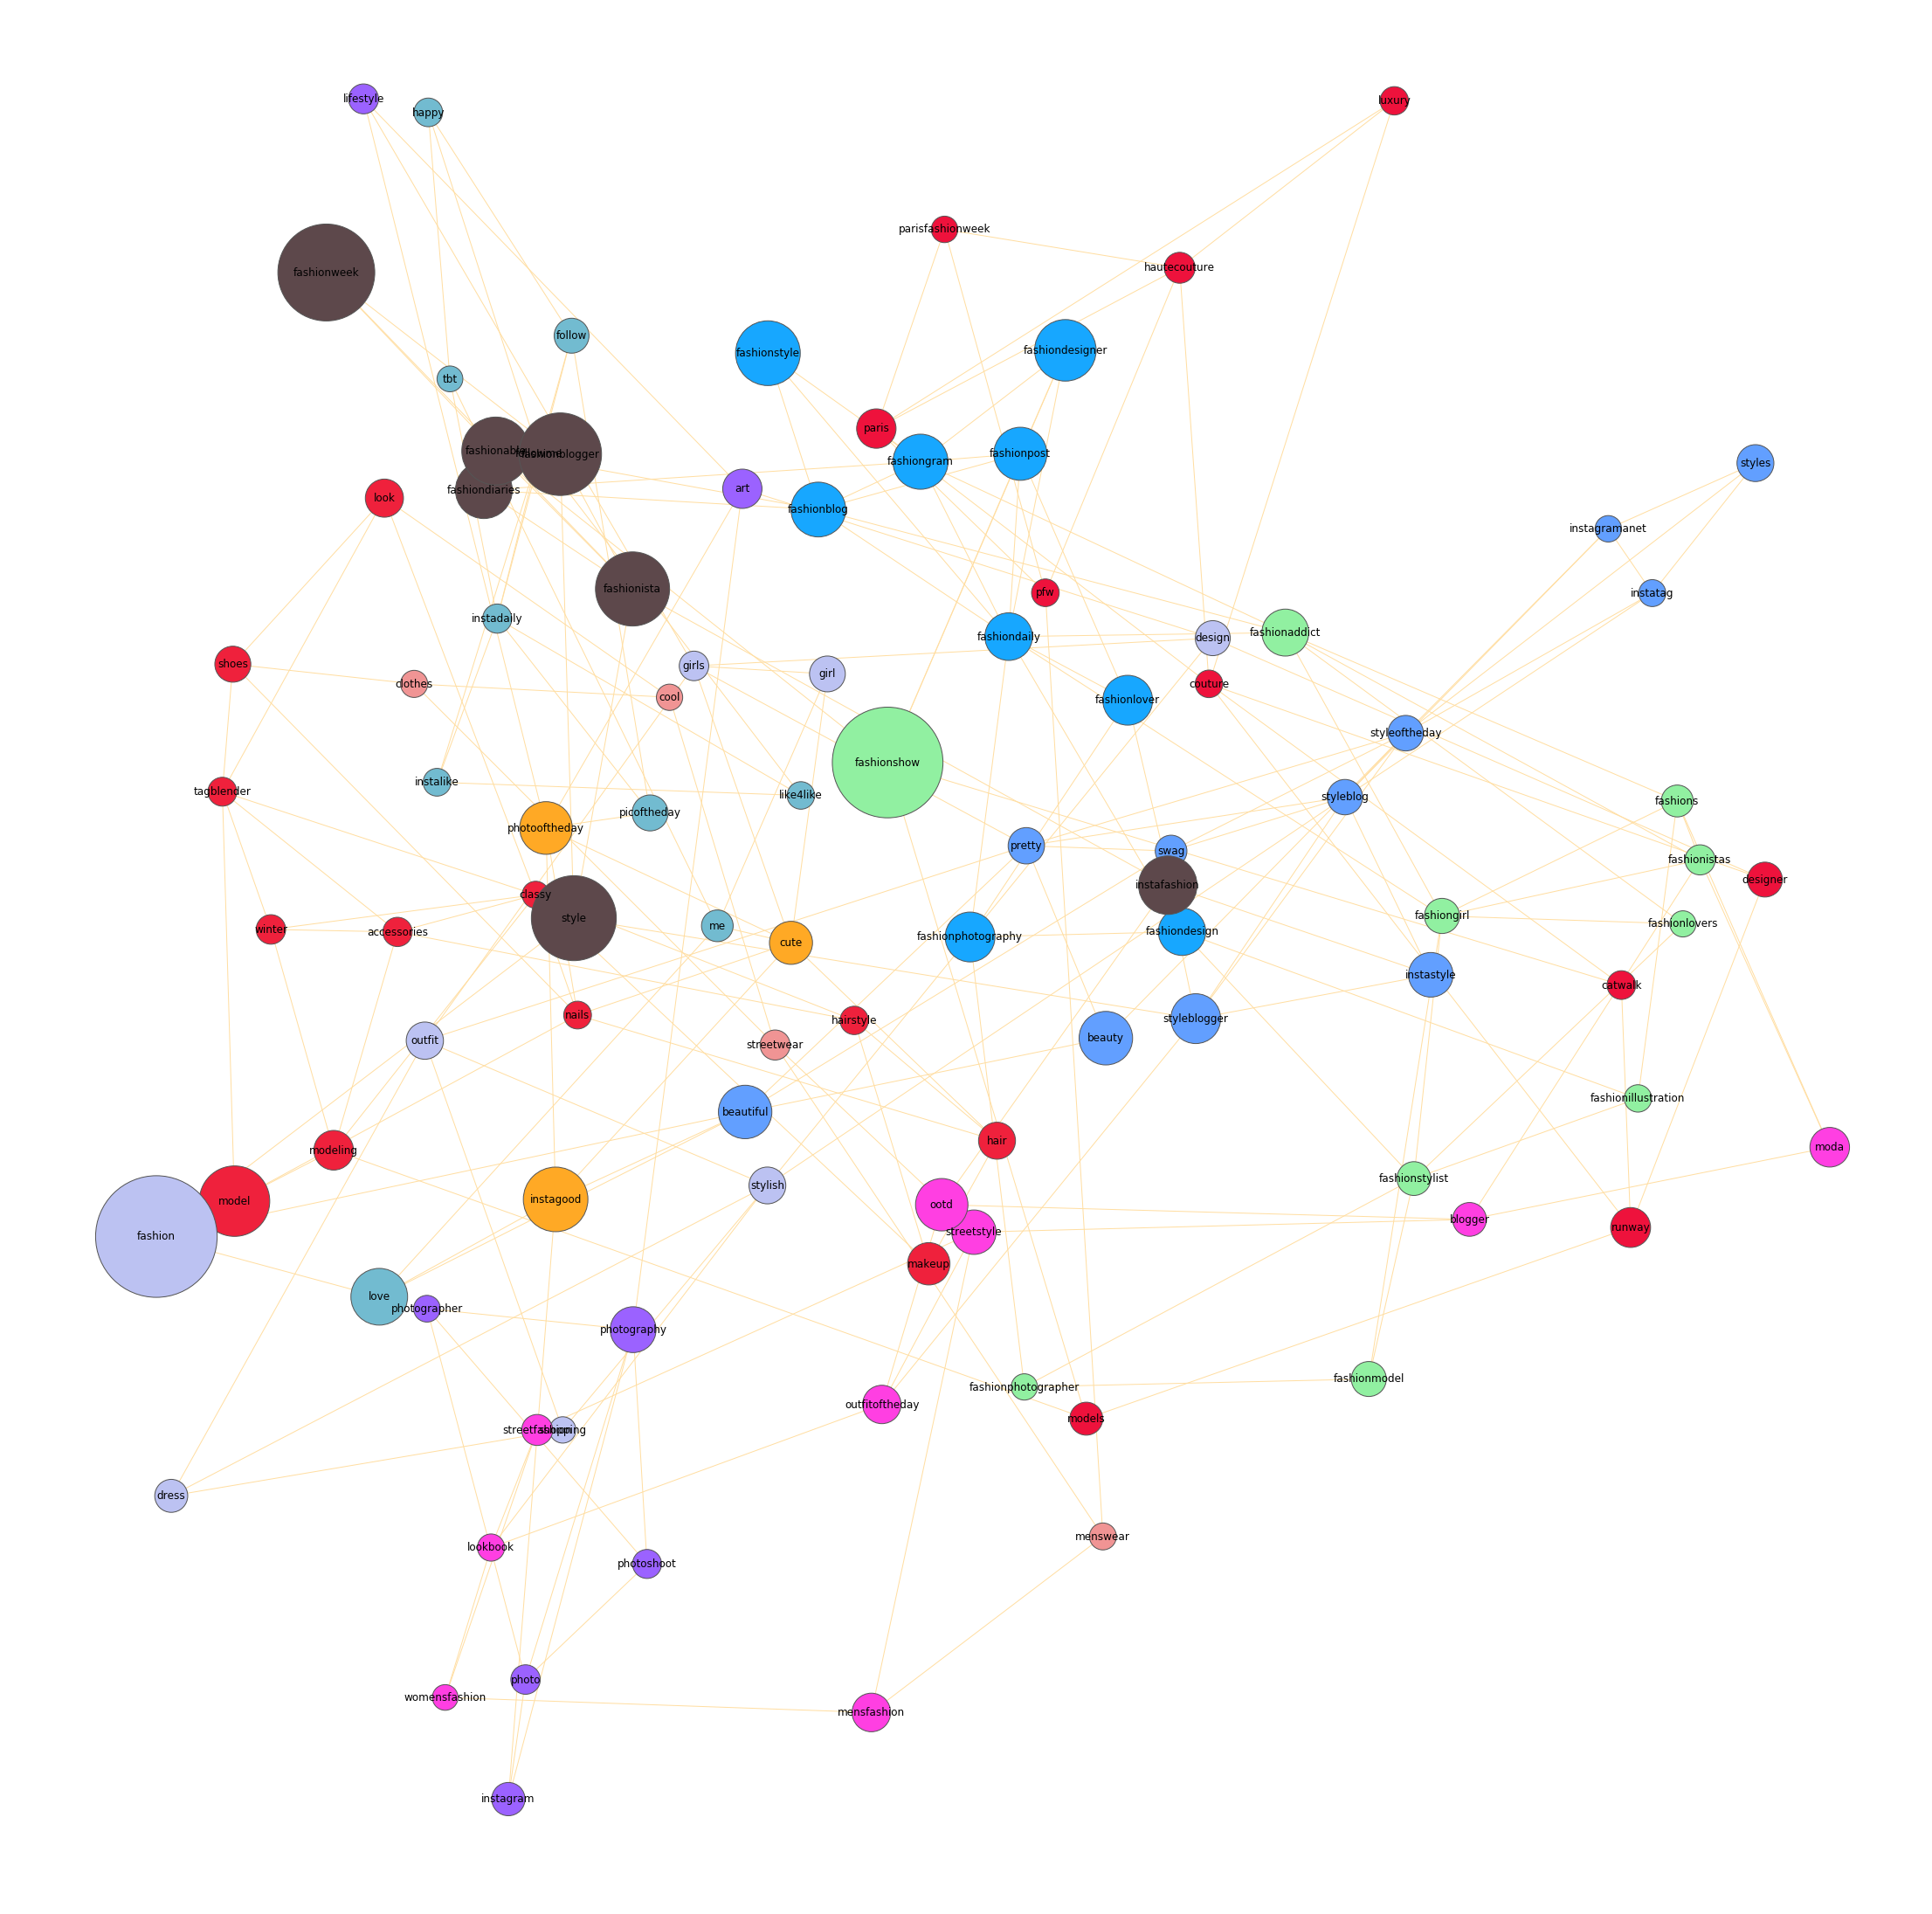

In [157]:
G = nx.Graph(day = "Stackoverflow")

for index,row in node_df.iterrows():
    G.add_node(row['Tag'], group = row['Group'], nodesize = row['Freq'])
    

# #     
# for index1,row1 in node_df.iterrows():
#     for index2,row2 in node_df.iterrows():
#         if row1['Tag'] == row2['Tag']:
#             continue
#         if corr_affinity[row1['Tag']][row2['Tag']] > -1:
#             G.add_edge(row1['Tag'],row2['Tag'],weight = corr_affinity[row1['Tag']][row2['Tag']]*3)


## corr_affinity 값이 높은 노드들만 엣지를 연결한다. 1개 ~ 5개 까지 조절 가능
i = 0
for index1,row1 in node_df.iterrows():
    for j in range(3):
        try:
            G.add_edge(row1['Tag'],max_values[i][j],weight = corr_affinity[row1['Tag']][max_values[i][j]]*5 )
        except:
            print('tag : ' + row1['Tag'] + ' i,j ' + str(i) + ' '+ str(j))
    
    i += 1

color_map = {1:'#f09494', 2:'#ee123c', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#FF3FE2', 0:'#ef213c', 8:'#9B62FF', 9:'#17A7FF', 10:'#FFA925', 11:'#5D484B'}
plt.figure(figsize = (30,30))

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*3 for node in G]

nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.1, iterations=10), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
fig = plt.gcf()
plt.show()
fig.savefig('Hash_Network_Graph_image/fashion20000_top100_AP_maxvalues_3')